<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61825590 sha256=8501a8d0a24d257a78e2db750c956f1537ce64a9d8f8966074efe4f4e49e08d1
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9437046 sha256=708252de49d21ad580edde1aef564ebb0359935af0ef7cf234dbd58e1e226524
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [302]:
import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-LINK", interval="minute15", count=430)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                       open    high     low   close        volume  \
2023-04-04 08:00:00  9595.0  9635.0  9585.0  9625.0   3165.415426   
2023-04-04 08:15:00  9625.0  9655.0  9625.0  9630.0   2745.620167   
2023-04-04 08:30:00  9630.0  9630.0  9565.0  9570.0  14221.344215   
2023-04-04 08:45:00  9590.0  9605.0  9580.0  9585.0   4631.711061   
2023-04-04 09:00:00  9585.0  9635.0  9545.0  9620.0   8382.321455   
...                     ...     ...     ...     ...           ...   
2023-04-08 18:45:00  9580.0  9580.0  9560.0  9565.0    557.493860   
2023-04-08 19:00:00  9560.0  9565.0  9555.0  9560.0   1301.845093   
2023-04-08 19:15:00  9560.0  9565.0  9560.0  9560.0    579.028098   
2023-04-08 19:30:00  9560.0  9570.0  9555.0  9560.0   5258.378815   
2023-04-08 19:45:00  9565.0  9565.0  9550.0  9550.0   1073.963075   

                            value  
2023-04-04 08:00:00  3.044645e+07  
2023-04-04 08:15:00  2.645716e+07  
2023-04-04 08:30:00  1.364171e+08  
2023-04-04 08:45:00  4.4437

In [303]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-04 08:00:00,9625.0
1,2023-04-04 08:15:00,9630.0
2,2023-04-04 08:30:00,9570.0
3,2023-04-04 08:45:00,9585.0
4,2023-04-04 09:00:00,9620.0
...,...,...
425,2023-04-08 18:45:00,9565.0
426,2023-04-08 19:00:00,9560.0
427,2023-04-08 19:15:00,9560.0
428,2023-04-08 19:30:00,9560.0


In [304]:
#prophet 불러옴
from fbprophet import Prophet

In [305]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [306]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=15, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


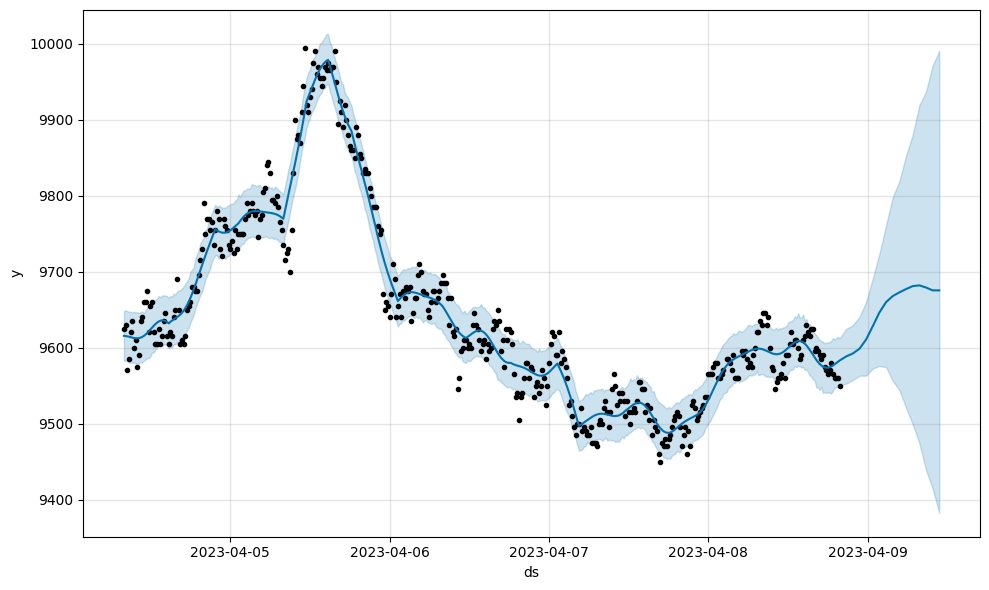

In [307]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


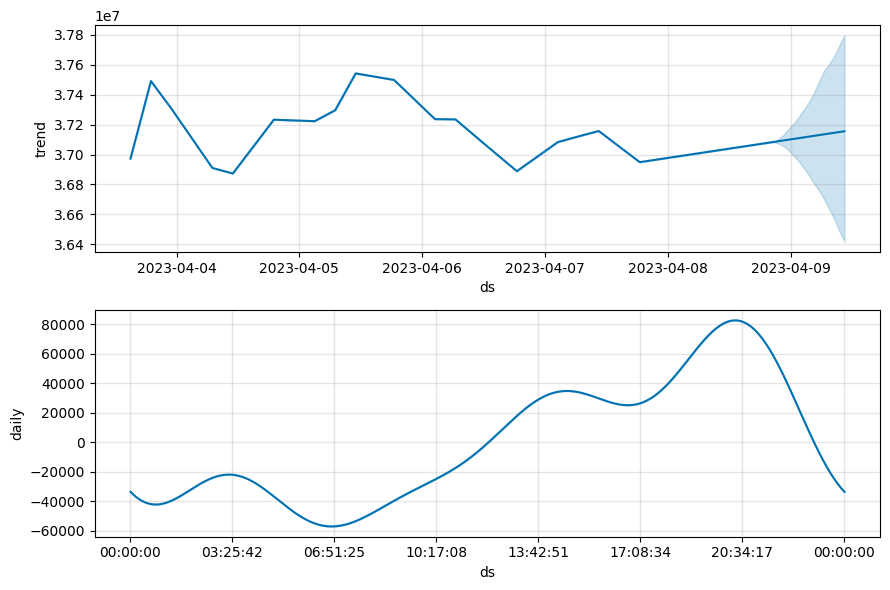

In [223]:
 #그래프2
fig2 = model.plot_components(forecast)